# How to use the framework


In [1]:
import warnings
import time
import argparse
from utils.conf import Conf
from imutils import paths
from __future__ import print_function
from index_features import generateFeatures
from StatisticalComparison import statisticalComparison
from train import train
warnings.simplefilter(action="ignore", category=FutureWarning)

/home/magarcd/.virtualenvs/gurus/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


### Configuring the dataset path

First of all we have to know the path which we have our dataset. The dataset must have a folder for each class that we want to predict. 

In [2]:
datasetPath = "/home/magarcd/Escritorio/ObjectClassificationByTransferLearning/ObjectClassificationByTransferLearning/minidatasetDogCat"

### Configuring output path

Now we have to indicate to the program where we want to save the results that the framework will generate.

In [3]:
outputPath = "output"

### Batch size

With this parameter, we configure the size of the batch in which the framework divides the set of images. Then the framework studies the images of each batch. This is to avoid high consumption of memory and optimize its use as much as possible. 

In [4]:
batchSize = 32 

### Feature Extractor

In this step we decide the feature extractor models that we are going to use with our dataset. These models will extract the most important points of the images. Then we save the points and with the classifier models that we will choose after this, we will clasify the images with the classes of the dataset. Each feature extractor model has a different way to collect the most important points and for this reason we have to compare the models, because there is not a model that always fits better with the datasets.

In [5]:
featureExtractors = [["vgg16","False"]]

Now that we have the feature extractor models we can execute the algorithm that collect the features of the dataset for each model. The only thing that we have to do is indicate the paths of the dataset and the output and the models that we want to use for the study. The verbose parameter is to indicate whether we want to appear information about the execution on console.

In [6]:
verbose = False
generateFeatures(outputPath, batchSize, datasetPath, featureExtractors, verbose)

This algorithm will create a set of files that contains the features of the images. Each file corresponds to a model of those indicated above. 

### Classification models

Once we have stored the features of the images, we have to choose the clasiffication models that we are going to use for the dataset. All these classifiers will be used for each feature extractor model to know which is the performance of every combination.

In [7]:
modelClassifiers = [ "MLP","SVM","KNN", "LogisticRegression", "RandomForest"]

With the classifiers chosen, now that we have to do is to carry out a statistical analysis. The analysis studies and compares every combination. Once the analysis has compared all the combinations gives us the best combination of feature extractor model and classifier model and all the combinations that have not significant differencies with the best result.  

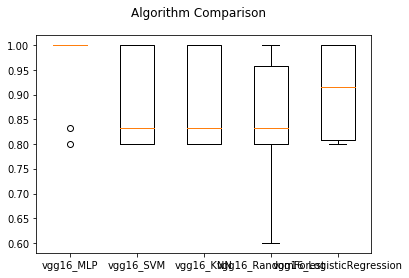

In [8]:
statisticalComparison(outputPath, datasetPath, featureExtractors, modelClassifiers, verbose)

Finally, we have to train the resulting combination. 

In [9]:
trainingSize = 1
train(outputPath, datasetPath, trainingSize)